In [616]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt

## 1. Gathering 

In [763]:
# loading data (file) from the local machine 
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df = twitter_archive_df.sort_values('timestamp')

In [764]:
# downloading data (file) from the udacity server?
# use V ML structure 
local = True
if local:
    image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')  
else:
    url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
    response = requests.get(url)
    
    with open('image-predictions.tsv', mode='wb') as file:
        file.write(response.content)

    image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [23]:
# Downloading data using Twitter API

consumer_key = '0zVspBBQa5oKRvJKqNsBQlmnD'
consumer_secret = 'CnVmOlDSD4L6aZAwjmOUywwFetvx6dU56m1bHnVNd9eQDS9ci0'
access_token = '1104226106671054848-jAnH6BPqkd2mnmsifIFdK7dDlYWryH'
access_secret = 'igQcy4hawlG0HkNzVA6Po0Sxvp34Elf5VhjXc2ZCnkYCf'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

tweet_ids = twitter_archive_df.tweet_id.values

with open('tweet_json.txt', 'w') as output:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
        except tweepy.TweepError:
            print('Error: tweet missing')

Error: tweet missing


Rate limit reached. Sleeping for: 569


Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing


Rate limit reached. Sleeping for: 285


Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing


In [24]:
# writting jason file 
tweets_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:
    
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        try:
            tweets_dict['tweet_id'] = tweets_json['extended_entities']['media'][0]['id']
        except:
            tweets_dict['tweet_id'] = 'na'

        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)

In [543]:
# converting to dataframe
tweets_df = pd.DataFrame(tweets_list)

## 2.Assessing 

2.1 Assessing twitter_archive_df 

In [765]:
# sample some for vizual assessing.Only briefly. bacause there too many data observations
# more efficient way is  programmatically 
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
294,837482249356513284,NaN,NaN,2017-03-03 01:58:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's a ship captain in real l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837482249...,13,10,Waffles,None,None,None,None
221,849776966551130114,NaN,NaN,2017-04-06 00:13:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys? Again? We only rate dogs. Plea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849776966...,12,10,None,None,None,None,None
866,762035686371364864,NaN,NaN,2016-08-06 21:20:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This left me speechless. 14/10 heckin heroic a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762035686...,14,10,None,None,None,None,None
1725,680070545539371008,NaN,NaN,2015-12-24 17:00:27 +0000,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680070545...,9,10,Emmie,None,None,None,None
1270,709449600415961088,NaN,NaN,2016-03-14 18:42:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Karma. She's just a head. Lost body durin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709449600...,10,10,Karma,None,None,None,None
2178,669015743032369152,NaN,NaN,2015-11-24 04:52:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog right here guys. Doesn't bark. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669015743...,10,10,None,None,None,None,None
1185,718613305783398402,NaN,NaN,2016-04-09 01:35:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carper. He's a Tortellini Angiosperm. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718613305...,11,10,Carper,None,None,None,None
620,796125600683540480,NaN,NaN,2016-11-08 23:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,NaN,NaN,NaN,https://twitter.com/king5seattle/status/796123...,13,10,None,None,None,None,None
1945,673707060090052608,NaN,NaN,2015-12-07 03:34:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He's absolutely terrified of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673707060...,10,10,Raymond,None,None,pupper,None
2195,668872652652679168,NaN,NaN,2015-11-23 19:24:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amélie. She is a confident white colle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668872652...,11,10,Amélie,None,None,None,None


In [762]:
# summarising the data. The output shows that there are missing values
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2355 to 0
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [621]:
# checing for null values in twitter_archive_df 
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

in_reply_to_status_id   and    in_reply_to_user_id  have   2278 null values

retweeted_status_id, retweeted_status_user_id , retweeted_status_timestamp 2175 null values

expanded_urls   59 null values

In [622]:
# checking for duplicates in the datset. the output show no duplicates in the dataset
twitter_archive_df.duplicated().sum()

0

In [623]:
# checking for rating numerator. 12 is the most common.
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

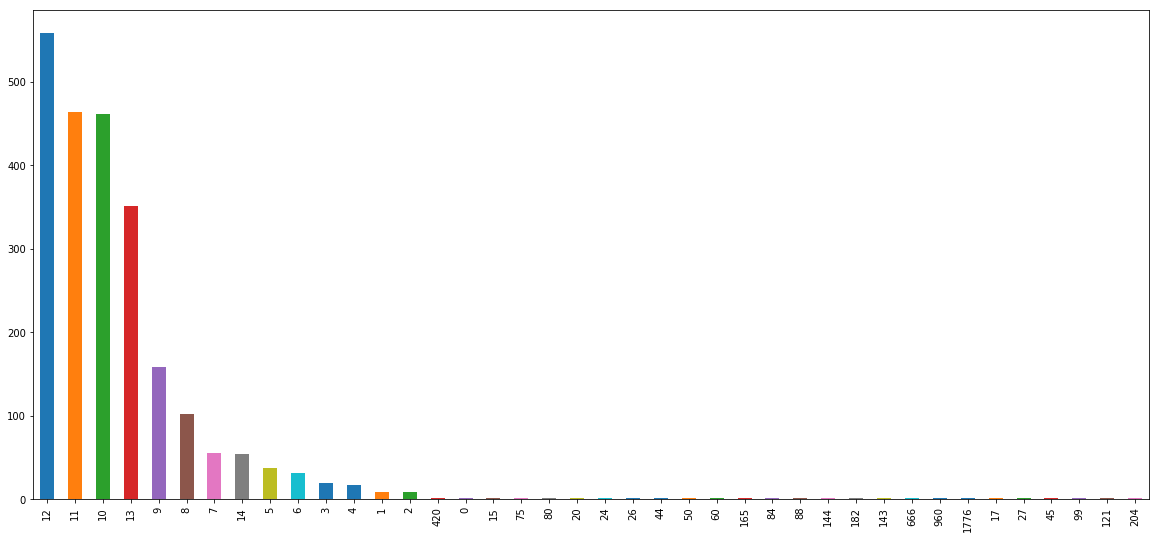

In [624]:
twitter_archive_df.rating_numerator.value_counts().plot.bar(figsize=(20,9))

In [625]:
#  whats the reasonable score greater than 20

In [626]:
# checking for rating denominator. 10 is the most common. Are values above 10 wrong
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [627]:
# checking for the frequency of names. the most commom is Charlie. Issues: are a=55, an=7,
# some names start with lower case while most with Capital
twitter_archive_df.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Lucy            11
Oliver          11
Tucker          10
Lola            10
Penny           10
Bo               9
Winston          9
the              8
Sadie            8
Toby             7
an               7
Bailey           7
Buddy            7
Daisy            7
Scout            6
Stanley          6
Leo              6
Oscar            6
Jax              6
Koda             6
Rusty            6
Bella            6
Jack             6
Milo             6
Dave             6
Sammy            5
              ... 
Lucky            1
Remy             1
Goliath          1
infuriating      1
Heinrich         1
Ruffles          1
Dallas           1
Stark            1
Kuyu             1
Brady            1
Geoff            1
Jaycob           1
Yoda             1
Kial             1
Daniel           1
Snicku           1
Georgie          1
Tom              1
Gordon           1
Koko             1
Jessifer         1
Venti       

In [628]:
# checking for the frequency of names. The most values are None  
twitter_archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [629]:
# checking for the frequency of names. The most values are None 
twitter_archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [630]:
# checking for the frequency of names. The most values are None 
twitter_archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [631]:
# checking for the frequency of names. The most values are None 
twitter_archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [632]:
# checking for the frequency of names. The most values are None 
twitter_archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

2.2 Assessing image_predictions_df

In [633]:
image_predictions_df.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
691,684200372118904832,https://pbs.twimg.com/media/CX7EkuHWkAESLZk.jpg,1,llama,0.681347,False,ram,0.120142,False,hog,0.043686,False
1706,817536400337801217,https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg,2,pug,0.971358,True,French_bulldog,0.028518,True,Boston_bull,0.000086,True
1511,786233965241827333,https://pbs.twimg.com/media/CulDnZpWcAAGbZ-.jpg,1,Labrador_retriever,0.478193,True,schipperke,0.224817,True,Staffordshire_bullterrier,0.077396,True
2010,878776093423087618,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,2,Italian_greyhound,0.734684,True,whippet,0.150487,True,Ibizan_hound,0.039725,True
630,680934982542561280,https://pbs.twimg.com/media/CXMqwIQWcAA2iE0.jpg,1,Labrador_retriever,0.784398,True,Siberian_husky,0.055925,True,beagle,0.022750,True
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True
1712,818588835076603904,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True
160,668902994700836864,https://pbs.twimg.com/media/CUhruUgUAAAa8FQ.jpg,1,Brittany_spaniel,0.828425,True,Ibizan_hound,0.043082,True,Blenheim_spaniel,0.028004,True
665,682750546109968385,https://pbs.twimg.com/media/CXmd_bsWkAEEXck.jpg,1,English_setter,0.947198,True,English_springer,0.031128,True,Brittany_spaniel,0.005512,True
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True


In [634]:
# summarising the data. The output shows that there are no missing values
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [635]:
# checking for dupplicated in the data set. No duplicates in the data set
image_predictions_df.duplicated().sum()

0

In [636]:
# checking for dupplicated in the data set. No null values in the data set
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [637]:
# checking for the frequency of number of images. 85% have 1 image and 1.5% has 4 images
image_predictions_df.img_num.value_counts(),image_predictions_df.img_num.value_counts(normalize=True)

(1    1780
 2     198
 3      66
 4      31
 Name: img_num, dtype: int64, 1    0.857831
 2    0.095422
 3    0.031807
 4    0.014940
 Name: img_num, dtype: float64)

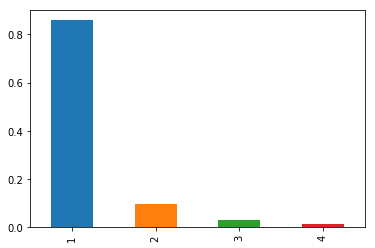

In [638]:
# visualising img_num counts 
image_predictions_df.img_num.value_counts(normalize=True).plot.bar();

In [639]:
# checking for the frequency of names in p3. Labrador_retriever is the most common 
image_predictions_df.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

2.3 Assessing tweets_d

In [640]:
tweets_df.sample(10)

,favorite_count,retweet_count,tweet_id
1494,5666,1577,763183833575481344
1583,11861,3174,777684227185868800
1231,3587,1101,730427195684999168
1718,9792,3603,794205269047836673
1209,4023,1451,727175367849549825
1415,38868,22346,na
198,1502,939,669583735898185728
1466,15393,6047,759923789979262976
1255,3732,1216,735991939804200964
241,329,114,670433242026217473


In [641]:
tweets_df.shape

(2337, 3)

In [642]:
# summarising the dataset 
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
favorite_count    2337 non-null int64
retweet_count     2337 non-null int64
tweet_id          2337 non-null object
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [643]:
# ckecking for dupplicates 
tweets_df.duplicated().sum()

0

In [644]:
tweets_df.isnull().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

In [645]:
tweets_df.tweet_id.value_counts().head()
# there are 274 na in tweet_it

na                    274
742423162642649089      2
800141411257643009      2
822244810299936769      2
733109473259085826      2
Name: tweet_id, dtype: int64

In [646]:
tweets_df.favorite_count.value_counts().head()
# there are 167 zeros

0       167
2741      4
329       4
2320      3
2753      3
Name: favorite_count, dtype: int64

#### Twiiter_archive_df
###### Quality
- numerator rating unexpected values too high
- denominator rating values not equal to 10
- Remove retweets and resctive id, status_id and timestamp
- name has lots of None
- doggo: most obseravtions None
- floofer, pupper and puppo also have the same issues as doggo
- name some names starting with Capital while others with lower case
- tweet_id numeric. should be categorical
- timestamp convert from object to datetime datatype
- converting both rating numerator and denminator fron int to floats

###### Tidiness
- doggo, floofer, pupper and puppo should be dog categories instead of individual varibales. these 4 varibales are different categories of the same variable and could be transformed into one called dog_stages or dog_categories.

- The df2 and df3 are part of the same observational unit as df1 but there are three separate tables so should be merged and stored in a file called twitter_archive_master.csv, as per the project instructions.

#### image_predictions_df
###### Quality
- p1 : initial letter some capitalised but others not
- tweet_id is numerical datatype

#### tweets_df
- tweet_id is numerical


In [647]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 3. Cleaning 

3.1 Cleaning twitter_archive_df

In [1154]:
# copying the data so that the changes in the clean version does not apply to the intitial df
clean_twitter_archive_df = twitter_archive_df.copy()

In [1155]:
clean_twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2355 to 0
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Define
- Eliminating anomalous rating; in numerator, all that are greater 14 and demoninator, all that are not equal to 10
- create a new variable rating ratio (numerator/denominator) and get rid of numerator and denominator columns
- converting both rating numerator and denminator and ration fron int to float

code 1

In [1156]:
# subseting only the valid obersvation and eliminating all rating > 14
clean_twitter_archive_df = clean_twitter_archive_df[clean_twitter_archive_df.rating_numerator < 15]

test 1

In [1157]:
clean_twitter_archive_df.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
3      19
4      17
1       9
2       9
0       2
Name: rating_numerator, dtype: int64

code 2

In [1158]:
# subseting only the valid obersvation and discarting all non-valid
clean_twitter_archive_df = clean_twitter_archive_df[clean_twitter_archive_df.rating_denominator == 10]

test 2

In [1159]:
clean_twitter_archive_df.rating_denominator.value_counts()

10    2321
Name: rating_denominator, dtype: int64

code 3

In [1160]:
clean_twitter_archive_df.rating_numerator = clean_twitter_archive_df.rating_numerator.astype(float)

In [1161]:
clean_twitter_archive_df.rating_numerator = clean_twitter_archive_df.rating_denominator.astype(float)

In [1162]:
# creating rating_ratio
clean_twitter_archive_df['rating_ratio'] = clean_twitter_archive_df.rating_numerator / clean_twitter_archive_df.rating_denominator

In [1163]:
# eliminating numerator and denominator columns
clean_twitter_archive_df.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

test 3

In [1164]:
# rating ratio is the last column to the right
clean_twitter_archive_df.head(0)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating_ratio


In [1165]:
clean_twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 2355 to 0
Data columns (total 16 columns):
tweet_id                      2321 non-null int64
in_reply_to_status_id         68 non-null float64
in_reply_to_user_id           68 non-null float64
timestamp                     2321 non-null object
source                        2321 non-null object
text                          2321 non-null object
retweeted_status_id           178 non-null float64
retweeted_status_user_id      178 non-null float64
retweeted_status_timestamp    178 non-null object
expanded_urls                 2271 non-null object
name                          2321 non-null object
doggo                         2321 non-null object
floofer                       2321 non-null object
pupper                        2321 non-null object
puppo                         2321 non-null object
rating_ratio                  2321 non-null float64
dtypes: float64(5), int64(1), object(10)
memory usage: 308.3+ KB


Define :
- Removing duplicates in the expanded_urls column

Code

In [1166]:
# checking for duplicates in the columns
clean_twitter_archive_df.expanded_urls.duplicated().sum()

126

In [1167]:
# removind duplicates
clean_twitter_archive_df.expanded_urls.drop_duplicates(keep=False, inplace=True)

Test

In [1168]:
# checking for duplicates in the columns
clean_twitter_archive_df.expanded_urls.duplicated().sum()

0

Define
- remove retweeted_status_id and retweeted_status_user_id, retweeted_status_timestamp. Not going to be used

code:

In [1169]:
clean_twitter_archive_df.drop(['in_reply_to_user_id', 'in_reply_to_status_id', 
                               'retweeted_status_id', 'retweeted_status_user_id',
                               'retweeted_status_timestamp'],  axis = 1,inplace = True) 

test

In [1170]:
list(clean_twitter_archive_df.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating_ratio']

Define 
- variable name has lots of None that shull be nulls. Change all to np.nan

Code:

In [1171]:
clean_twitter_archive_df.name.replace("None", np.nan, inplace=True)

test:

In [1172]:
clean_twitter_archive_df.name.value_counts()

a              54
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Tucker         10
Penny          10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Toby            7
Buddy           7
Daisy           7
Bailey          7
Koda            6
Scout           6
Leo             6
Dave            6
Jax             6
Bella           6
an              6
Stanley         6
Oscar           6
Rusty           6
Milo            6
Jack            6
Larry           5
Finn            5
               ..
Karma           1
Goliath         1
Lucky           1
Remy            1
Dallas          1
infuriating     1
Heinrich        1
Ruffles         1
Kuyu            1
Geoff           1
Jaycob          1
Emanuel         1
Ralphé          1
Yoda            1
Snicku          1
Kial            1
Daniel          1
Tom             1
Georgie         1
Gordon          1
Rodman          1
Koko            1
Jessifer        1
Venti           1
Vinscent  

Define
- capitalise all initial in name varible 

code

In [1173]:
clean_twitter_archive_df.name = clean_twitter_archive_df.name.str.capitalize()

test

In [1174]:
clean_twitter_archive_df.name.value_counts()

A              54
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
Sadie           8
The             8
Bailey          7
Buddy           7
Daisy           7
Toby            7
Jax             6
Koda            6
Dave            6
Milo            6
Scout           6
An              6
Rusty           6
Jack            6
Bella           6
Oscar           6
Stanley         6
Leo             6
Finn            5
Sunny           5
               ..
Maxwell         1
Monster         1
Lucky           1
Remy            1
Trevith         1
Heinrich        1
Ruffles         1
Infuriating     1
Karma           1
Emanuel         1
Shelby          1
Murphy          1
Gordon          1
Kial            1
Rodman          1
Daniel          1
Vinscent        1
Georgie         1
Jaycob          1
Geoff           1
Koko            1
Jessifer        1
Venti           1
Kuyu            1
Chevy     

elimintate my functions  for dog categories 

Define 
- make one column dog_stage for puppo, pupper, floofer and doggo. Ascribe None if dog stage is not given
- variables puppo, pupper, floofer and doggo  has lots of None that shull be nulls. 
- Change all to np.nan also change empty raws to n.nan
- deleting puppo, pupper, floofer and doggo invidual variables
- change its (dog_stage) datatype from int to categorical

Code

In [1175]:
# Create new column for dog_stage instead of ['doggo', 'floofer', 'pupper', 'puppo']
clean_twitter_archive_df['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def get_dog_stage(row):
    # Keep all dog stages ()
    dog_stage = []
    
    # Record all times dog stage is given
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: # Default to 'None' if list is empty
        row['dog_stage'] = 'None'
    else: 
        # Update the row and give back the final row
        row['dog_stage'] = ','.join(dog_stage)
    
    #Return updated column
    return row

# Apply to each row
clean_twitter_archive_df = clean_twitter_archive_df.apply(get_dog_stage, axis=1)

In [1176]:
# converting the new varibale into a categorical datatype
clean_twitter_archive_df.dog_stage = clean_twitter_archive_df.dog_stage.astype('category')

In [1177]:
# attributing np.nan for None
clean_twitter_archive_df.dog_stage.replace("None", np.nan, inplace=True)

In [1178]:
#  deleting individual columns 
clean_twitter_archive_df = clean_twitter_archive_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

Test

In [1179]:
clean_twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 2355 to 0
Data columns (total 8 columns):
tweet_id         2321 non-null int64
timestamp        2321 non-null object
source           2321 non-null object
text             2321 non-null object
expanded_urls    2271 non-null object
name             1601 non-null object
rating_ratio     2321 non-null float64
dog_stage        379 non-null category
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 147.7+ KB


In [1180]:
clean_twitter_archive_df.dog_stage.value_counts()

pupper           244
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
None               0
Name: dog_stage, dtype: int64

Define 
- weet_id numeric. should be categorical. covert to the latter using astye

Code

In [1181]:
clean_twitter_archive_df.tweet_id = clean_twitter_archive_df.tweet_id.astype(str)

test

In [1182]:
clean_twitter_archive_df.tweet_id.head(1)

2355    666020888022790149
Name: tweet_id, dtype: object

Define 
- Change datatype for timestamp from object to datetime 

Code 

In [901]:
clean_twitter_archive_df.timestamp = pd.to_datetime(clean_twitter_archive_df.timestamp, infer_datetime_format=True)

test

In [902]:
clean_twitter_archive_df.timestamp.head(1)

2355   2015-11-15 22:32:08
Name: timestamp, dtype: datetime64[ns]

Define
- Make sure that tweets with these character  '^RT @' as excluded as they represent retweets

In [1184]:
# Finding all the retweets 
retweets = clean_twitter_archive_df.text.str.match('^RT @')

# Only keep the tweets that aren't retweets
clean_twitter_archive_df = clean_twitter_archive_df[~retweets]

Test

In [1185]:
# Test that there are no retweets
retweets = clean_twitter_archive_df.text.str.match('^RT @')
clean_twitter_archive_df[retweets]

,tweet_id,timestamp,source,text,expanded_urls,name,rating_ratio,dog_stage


In [1186]:
# no retweets 

3.2 Assessing image_predictions_df

In [1187]:
# copying the data so that the changes in the clean version does not apply to the intitial df
clean_image_predictions_df = image_predictions_df.copy()

Define
- rename img_num, p1, p1_config, p1_dog variable so as to become more informative
- delete p2,p2_conf, p2_dog, p3, p3_conf, p3_dog
- capitise names in p1
- change it to caregorical datatype

In [1188]:
clean_image_predictions_df.p1.value_counts().head()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: p1, dtype: int64

Code

In [1189]:
# changing the names of the columns
clean_image_predictions_df.rename(columns={'img_num': 'image_count',
                                    'p1': 'predicted_dog',
                                    'p1_conf': 'confidence',
                                    'p1_dog':'breed_dog_or_not'}, inplace=True)
# deleting the other variables
clean_image_predictions_df.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 
                  'p3_conf', 'p3_dog'], inplace = True, axis = 1)

# capitalising p1 (now predicted_dog) names
clean_image_predictions_df.predicted_dog = clean_image_predictions_df.predicted_dog.str.capitalize()

test

In [1190]:
clean_image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id            2075 non-null int64
jpg_url             2075 non-null object
image_count         2075 non-null int64
predicted_dog       2075 non-null object
confidence          2075 non-null float64
breed_dog_or_not    2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


Define
- tweet_id is a numerical.Change into a string

Code

In [1191]:
clean_image_predictions_df.tweet_id = clean_image_predictions_df.tweet_id.astype(str)

Test

In [1192]:
clean_image_predictions_df.tweet_id.head(1)

0    666020888022790149
Name: tweet_id, dtype: object

3.3 Cleaning tweets_df

In [1193]:
# copying the data so that the changes in the clean version does not apply to the intitial df
clean_tweets_df = tweets_df.copy()

In [1194]:
clean_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
favorite_count    2337 non-null int64
retweet_count     2337 non-null int64
tweet_id          2337 non-null object
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [1195]:
clean_tweets_df.describe()

,favorite_count,retweet_count
count,2337.000000,2337.000000
mean,7883.113393,2898.118100
std,12225.430530,4889.405005
min,0.000000,1.000000
25%,1363.000000,582.000000
50%,3425.000000,1350.000000
75%,9655.000000,3378.000000
max,162768.000000,82849.000000


Define
- tweet_id is numerical.Convert it into categorical

Code

In [1196]:
clean_tweets_df.tweet_id = clean_tweets_df.tweet_id.astype(str)

Test

In [1197]:
clean_tweets_df.tweet_id.head(1)

0    666020881337073664
Name: tweet_id, dtype: object

3.4 Combining all three datasets

Define 
- combine all three cleaned datasets

Code

In [1198]:
# joining the datasets
twitter_archive_master = clean_twitter_archive_df.merge(clean_image_predictions_df, on='tweet_id')
twitter_archive_master = twitter_archive_master.append(clean_tweets_df, sort=False) 

Test

In [1199]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4308 entries, 0 to 2336
Data columns (total 15 columns):
tweet_id            4308 non-null object
timestamp           1971 non-null object
source              1971 non-null object
text                1971 non-null object
expanded_urls       1971 non-null object
name                1439 non-null object
rating_ratio        1971 non-null float64
dog_stage           305 non-null object
jpg_url             1971 non-null object
image_count         1971 non-null float64
predicted_dog       1971 non-null object
confidence          1971 non-null float64
breed_dog_or_not    1971 non-null object
favorite_count      2337 non-null float64
retweet_count       2337 non-null float64
dtypes: float64(5), object(10)
memory usage: 538.5+ KB


4. Store

In [1200]:
# saving the clean datasets into csv files locally

twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)
clean_twitter_archive_df.to_csv('archive_clean.csv', encoding='utf-8', index=False)
clean_image_predictions_df.to_csv('image_clean.csv', encoding='utf-8', index=False)
clean_tweets_df.to_csv('clean_tweets.csv', encoding='utf-8', index=False)

5. Analysis and Vizualisations

In [1205]:
# summarising the data. there are many missing values in different columns
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4308 entries, 0 to 2336
Data columns (total 15 columns):
tweet_id            4308 non-null object
timestamp           1971 non-null object
source              1971 non-null object
text                1971 non-null object
expanded_urls       1971 non-null object
name                1439 non-null object
rating_ratio        1971 non-null float64
dog_stage           305 non-null object
jpg_url             1971 non-null object
image_count         1971 non-null float64
predicted_dog       1971 non-null object
confidence          1971 non-null float64
breed_dog_or_not    1971 non-null object
favorite_count      2337 non-null float64
retweet_count       2337 non-null float64
dtypes: float64(5), object(10)
memory usage: 538.5+ KB


In [1206]:
twitter_archive_master.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,name,rating_ratio,dog_stage,jpg_url,image_count,predicted_dog,confidence,breed_dog_or_not,favorite_count,retweet_count
1008,710269109699739648,2016-03-17 00:58:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The squad is back for St. Patrick's Day! ☘ 💚\n...,https://twitter.com/dog_rates/status/710269109...,NaN,1.0,NaN,https://pbs.twimg.com/media/Cdth_KyWEAEXH3u.jpg,1.0,Pug,0.415495,True,NaN,NaN
1221,728751174258708481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2872.0,711.0
410,673707042180341760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1107.0,401.0
917,702684942141153280,2016-02-25 02:42:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's sick of these bullshit gen...,https://twitter.com/dog_rates/status/702684942...,Lucy,1.0,NaN,https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg,1.0,Golden_retriever,0.514085,True,NaN,NaN
1559,803638050916102144,2016-11-29 16:33:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pupper hath acquire enemy. 13/10 https://t.co/...,https://twitter.com/dog_rates/status/803638050...,NaN,1.0,pupper,https://pbs.twimg.com/ext_tw_video_thumb/80363...,1.0,Labrador_retriever,0.372776,True,NaN,NaN
847,696877980375769088,2016-02-09 02:07:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She's in a predicament. Not sur...,https://twitter.com/dog_rates/status/696877980...,Misty,1.0,pupper,https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg,1.0,Space_heater,0.206876,False,NaN,NaN
2136,852553437929721865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16642.0,3627.0
559,677301027595530240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1278.0,430.0
1076,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1854.0,691.0
351,672466070121390080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1362.0,551.0


In [1221]:
# checking for duplicates. there are not dupplicates
twitter_archive_master.duplicated().sum()

0

In [1223]:
# checking for null values. most variabales have null values 
twitter_archive_master.isnull().sum()

tweet_id               0
timestamp           2337
source              2337
text                2337
expanded_urls       2337
name                2869
rating_ratio        2337
dog_stage           4003
jpg_url             2337
image_count         2337
predicted_dog       2337
confidence          2337
breed_dog_or_not    2337
favorite_count      1971
retweet_count       1971
dtype: int64

In [1204]:
# descriptive statistics of the numerical variables in twitter_archive_master dataset
twitter_archive_master.describe()

,rating_ratio,image_count,confidence,favorite_count,retweet_count
count,1971.0,1971.00000,1971.000000,2337.000000,2337.000000
mean,1.0,1.20345,0.593893,7883.113393,2898.118100
std,0.0,0.56164,0.272043,12225.430530,4889.405005
min,1.0,1.00000,0.044333,0.000000,1.000000
25%,1.0,1.00000,0.361530,1363.000000,582.000000
50%,1.0,1.00000,0.587764,3425.000000,1350.000000
75%,1.0,1.00000,0.844583,9655.000000,3378.000000
max,1.0,4.00000,1.000000,162768.000000,82849.000000


Avergae favorite_count is greater than retweet_count's. the same applies for standard deviation and maximum value

In [1207]:
twitter_archive_master.image_count.value_counts()

1.0    1691
2.0     189
3.0      61
4.0      30
Name: image_count, dtype: int64

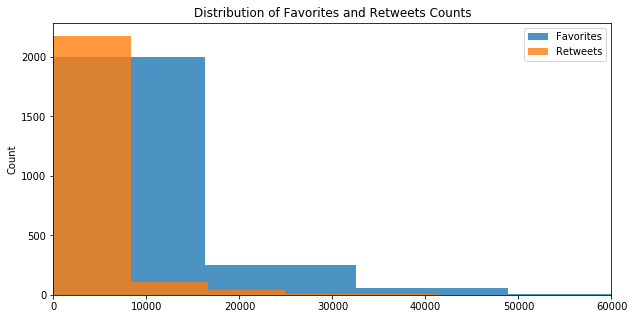

In [1208]:
# distribution of favorite_counts and retweet_count

# Histograms of favorites and retweets
plt.figure(figsize=(10, 5))
plt.xlim(0, 60000)
plt.ylabel('Count')
plt.hist(twitter_archive_master.favorite_count, alpha=.8, label='Favorites')
plt.hist(twitter_archive_master.retweet_count, alpha=.8, label='Retweets')
plt.title('Distribution of Favorites and Retweets Counts')
plt.legend(loc='best');

In [1209]:
# both histograms are skewed to the right 

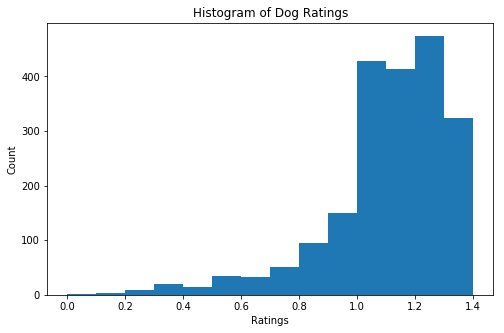

In [742]:
# distribution of rating_ratios

# Ratings
plt.figure(figsize = (8, 5))
plt.xlabel('Ratings')
plt.ylabel('Count')
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4]
plt.hist(twitter_archive_master.rating_ratio, bins = bins)
         
plt.title('Histogram of Dog Ratings');

In [743]:
# rating_ration are skewed to the left. there are more higher ratings than lower ones

In [1212]:
# distribution of dog_categories
twitter_archive_master.dog_stage.value_counts(normalize=True)

pupper           0.662295
doggo            0.206557
puppo            0.072131
doggo,pupper     0.029508
floofer          0.022951
doggo,floofer    0.003279
doggo,puppo      0.003279
Name: dog_stage, dtype: float64

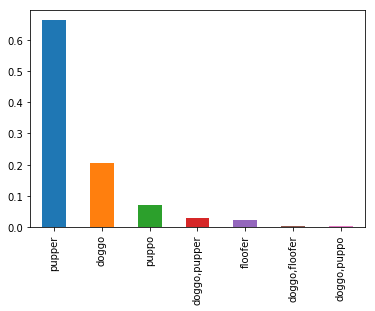

In [1213]:
twitter_archive_master.dog_stage.value_counts(normalize=True).plot.bar()

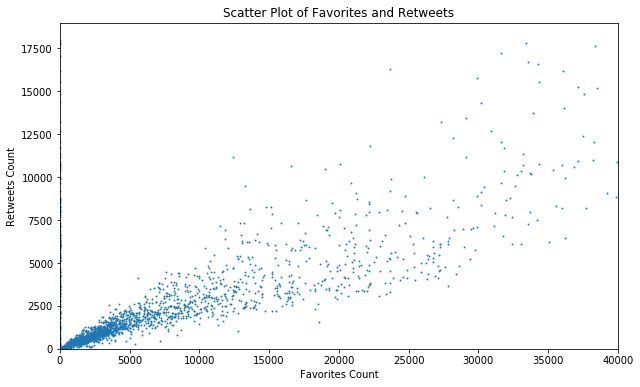

In [1214]:
# Scatter plot of favorites and retweets.
plt.figure(figsize=(10, 6))
plt.xlim(0, 40000)
plt.ylim(0, 19000)
plt.xlabel('Favorites Count')
plt.ylabel('Retweets Count')
plt.plot(twitter_archive_master.favorite_count,twitter_archive_master.retweet_count, 
         linestyle='',marker='o', markersize=0.9)
plt.title('Scatter Plot of Favorites and Retweets');

In [1215]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4308 entries, 0 to 2336
Data columns (total 15 columns):
tweet_id            4308 non-null object
timestamp           1971 non-null object
source              1971 non-null object
text                1971 non-null object
expanded_urls       1971 non-null object
name                1439 non-null object
rating_ratio        1971 non-null float64
dog_stage           305 non-null object
jpg_url             1971 non-null object
image_count         1971 non-null float64
predicted_dog       1971 non-null object
confidence          1971 non-null float64
breed_dog_or_not    1971 non-null object
favorite_count      2337 non-null float64
retweet_count       2337 non-null float64
dtypes: float64(5), object(10)
memory usage: 538.5+ KB


Text(0, 0.5, 'Frequency')

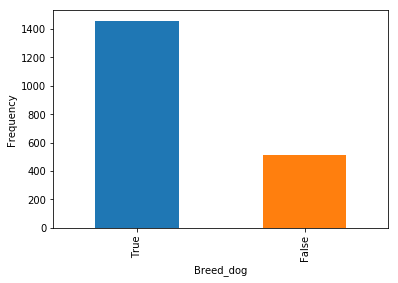

In [1219]:
twitter_archive_master.breed_dog_or_not.value_counts().plot.bar()
plt.xlabel('Breed_dog')
plt.ylabel('Frequency')

In [1220]:
# the are more breed_dog (predicted) to be true than false.